In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# Baca data
path = r"D:\Learning\PROJECTS\KMA_Binary\KMA-Binary-Version\src\results\kma_params\kma_experiments_results_experiment_random_hyp_KMA.csv"

df = pd.read_csv(path)

df['Group'] = (df.index // 10) + 1

hyperparameter_columns = ['pop_size', 'max_num_eva', 'min_adaptive_size', 'max_adaptive_size', 'max_gen_exam1', 'max_gen_exam2']

result = df.groupby('Group').agg({
    **{col: 'first' for col in hyperparameter_columns}, 
    'Accuracy': 'mean', 
    'Number_Selected_Features': 'median'
}).reset_index()

result.to_csv('summary_results_with_hyperparameters.csv', index=False)

print(result)

    Group  pop_size  max_num_eva  min_adaptive_size  max_adaptive_size  \
0       1        15         1000                  1                  8   
1       2         7         1000                  5                  6   
2       3         5         1000                  1                  7   
3       4        14         1000                  5                  7   
4       5         8         2500                  5                  8   
..    ...       ...          ...                ...                ...   
95     96        11         1000                  5                  9   
96     97        10         2000                  4                  9   
97     98        14         1500                  4                  7   
98     99        12         1000                  4                  8   
99    100        12         1500                  5                 10   

    max_gen_exam1  max_gen_exam2  Accuracy  Number_Selected_Features  
0              40            200  0.9596

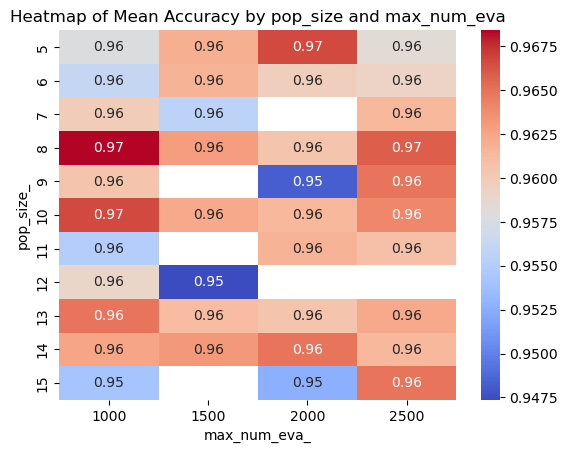

Kombinasi terbaik berdasarkan rata-rata akurasi:
    pop_size_  max_num_eva_  min_adaptive_size_  max_adaptive_size_  \
32          8          1000                   5                   6   
39          8          2500                   3                   8   
80         14          1000                   1                   9   

    max_gen_exam1_  max_gen_exam2_  Accuracy_mean  Accuracy_std  Accuracy_max  \
32              70             500       0.968421      0.008474      0.982456   
39              40             200       0.967544      0.007222      0.982456   
80              20             500       0.966667      0.009959      0.982456   

    Accuracy_min  
32      0.956140  
39      0.956140  
80      0.947368  


In [57]:
# Baca data
path = r"D:\Learning\PROJECTS\KMA_Binary\KMA-Binary-Version\src\results\kma_params\kma_experiments_results_experiment_random_hyp_KMA.csv"
df = pd.read_csv(path)

# Pilih kolom hyperparameter
hyperparameter_columns = ['pop_size', 'max_num_eva', 'min_adaptive_size', 'max_adaptive_size', 'max_gen_exam1', 'max_gen_exam2']

# Hitung rata-rata dan standar deviasi akurasi untuk setiap kombinasi hyperparameter
performance = df.groupby(hyperparameter_columns).agg({
    'Accuracy': ['mean', 'std', 'max', 'min']
}).reset_index()

# Ubah nama kolom multi-indeks menjadi kolom datar
performance.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in performance.columns]

# Visualisasi (Heatmap)
heatmap_data = performance.pivot_table(
    index='pop_size_',
    columns='max_num_eva_',
    values='Accuracy_mean'
)

sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
plt.title("Heatmap of Mean Accuracy by pop_size and max_num_eva")
plt.show()

# Tampilkan kombinasi dengan akurasi rata-rata terbaik
best_combination = performance.sort_values('Accuracy_mean', ascending=False).head(3)
print("Kombinasi terbaik berdasarkan rata-rata akurasi:")
print(best_combination)

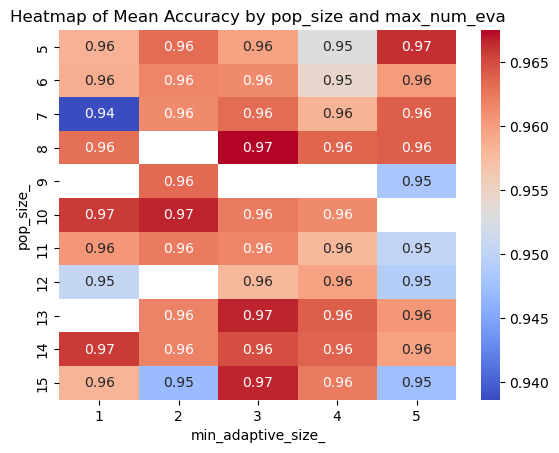

In [50]:
# Visualisasi (Heatmap)
heatmap_data = performance.pivot_table(
    index='pop_size_',
    columns='min_adaptive_size_',
    values='Accuracy_mean'
)

sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
plt.title("Heatmap of Mean Accuracy by pop_size and max_num_eva")
plt.show()

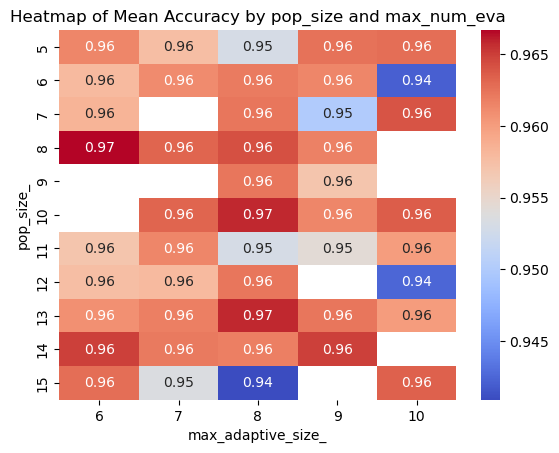

In [51]:
# Visualisasi (Heatmap)
heatmap_data = performance.pivot_table(
    index='pop_size_',
    columns='max_adaptive_size_',
    values='Accuracy_mean'
)

sns.heatmap(heatmap_data, annot=True, cmap="coolwarm")
plt.title("Heatmap of Mean Accuracy by pop_size and max_num_eva")
plt.show()

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Persiapkan data
X = performance[['pop_size_', 'max_num_eva_', 'min_adaptive_size_', 'max_adaptive_size_', 'max_gen_exam1_', 'max_gen_exam2_']]
y = performance['Accuracy_mean']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Feature importance
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.2f}")


pop_size_: 0.27
max_num_eva_: 0.08
min_adaptive_size_: 0.15
max_adaptive_size_: 0.12
max_gen_exam1_: 0.18
max_gen_exam2_: 0.20


In [55]:
performance

,pop_size_,max_num_eva_,min_adaptive_size_,max_adaptive_size_,max_gen_exam1_,max_gen_exam2_,Accuracy_mean,Accuracy_std,Accuracy_max,Accuracy_min
0,5,1000,1,7,40,500,0.951754,0.036108,0.973684,0.850877
1,5,1000,2,7,70,400,0.963158,0.008061,0.973684,0.956140
2,5,1000,3,6,10,500,0.961404,0.007397,0.973684,0.956140
3,5,1000,3,7,100,300,0.957895,0.008061,0.964912,0.938596
4,5,1000,4,8,10,100,0.946491,0.043654,0.973684,0.824561
...,...,...,...,...,...,...,...,...,...,...
95,15,2000,1,7,50,200,0.953509,0.030118,0.964912,0.868421
96,15,2000,1,10,30,500,0.961404,0.009430,0.982456,0.947368
97,15,2000,2,8,60,200,0.933333,0.094404,0.991228,0.666667
98,15,2000,4,10,90,400,0.962281,0.008322,0.973684,0.947368


In [36]:
# Urutkan berdasarkan rata-rata akurasi (Accuracy_mean)
performance_sorted = performance.sort_values(by='Accuracy_mean', ascending=False)

# Kombinasi terbaik berdasarkan rata-rata akurasi
best_combination = performance_sorted.head(3)

# Tampilkan hasil
print("Kombinasi hyperparameter terbaik berdasarkan rata-rata akurasi:")
print(best_combination)

Kombinasi hyperparameter terbaik berdasarkan rata-rata akurasi:
    pop_size_  max_num_eva_  min_adaptive_size_  max_adaptive_size_  \
32          8          1000                   5                   6   
38          8          2500                   3                   8   
78         14          1000                   1                   9   

    Accuracy_mean  Accuracy_std  
32       0.968421      0.008474  
38       0.967544      0.007222  
78       0.966667      0.009959  


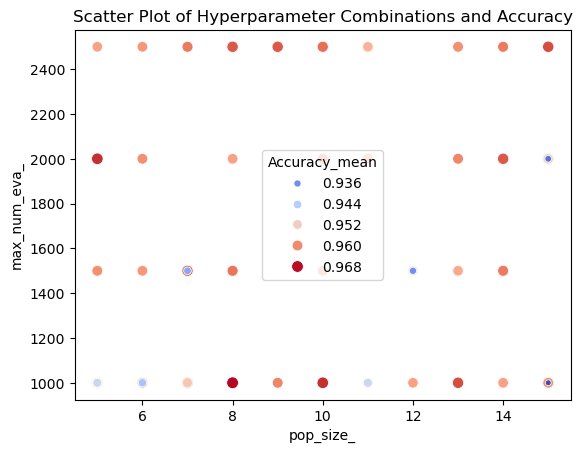

In [56]:
# Scatter plot untuk 2 hyperparameter
sns.scatterplot(
    data=performance_sorted,
    x='pop_size_',
    y='max_num_eva_',
    size='Accuracy_mean',
    hue='Accuracy_mean',
    palette='coolwarm'
)
plt.title("Scatter Plot of Hyperparameter Combinations and Accuracy")
plt.show()

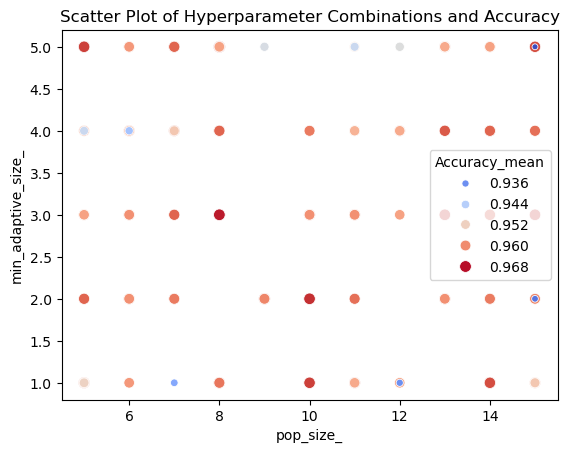

In [40]:
# Scatter plot untuk 2 hyperparameter
sns.scatterplot(
    data=performance_sorted,
    x='pop_size_',
    y='min_adaptive_size_',
    size='Accuracy_mean',
    hue='Accuracy_mean',
    palette='coolwarm'
)
plt.title("Scatter Plot of Hyperparameter Combinations and Accuracy")
plt.show()

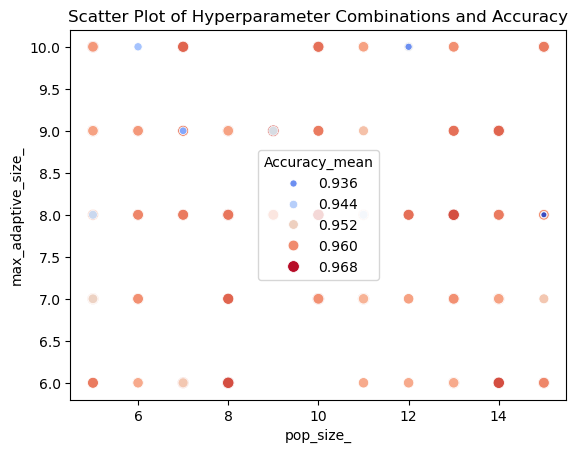

In [41]:
# Scatter plot untuk 2 hyperparameter
sns.scatterplot(
    data=performance_sorted,
    x='pop_size_',
    y='max_adaptive_size_',
    size='Accuracy_mean',
    hue='Accuracy_mean',
    palette='coolwarm'
)
plt.title("Scatter Plot of Hyperparameter Combinations and Accuracy")
plt.show()

In [4]:
# Baca data
path = r"D:\Learning\PROJECTS\KMA_Binary\KMA-Binary-Version\src\results\transfer_function\kma_experiments_transfer_function.csv"

df = pd.read_csv(path)

# Group by 'transfer_function' and calculate averages
grouped_df = df.groupby('transfer_function').agg({
    'Accuracy': ['mean', 'max', 'min'],
    'Processing_Time': 'mean',
    'Number_Selected_Features': 'mean'
}).reset_index()

# Rename columns for clarity
grouped_df.columns = [
    'Transfer Function', 
    'Average Accuracy', 
    'Maximum Accuracy', 
    'Minimum Accuracy', 
    'Average Processing Time', 
    'Average Number of Selected Features'
]

# Save results to a new CSV (optional)
output_file = 'averages_by_transfer_function.csv'
grouped_df.to_csv(output_file, index=False)

# Print results
print(grouped_df)

   Transfer Function  Average Accuracy  Maximum Accuracy  Minimum Accuracy  \
0         s_shaped_1          0.964035          0.973684          0.956140   
1         s_shaped_2          0.948246          0.973684          0.570175   
2         s_shaped_3          0.966959          0.991228          0.938596   
3         s_shaped_4          0.964035          0.982456          0.947368   
4    time_varying_s1          0.963450          0.982456          0.947368   
5    time_varying_s2          0.945029          0.991228          0.684211   
6    time_varying_s3          0.962573          0.982456          0.956140   
7    time_varying_s4          0.962573          0.982456          0.956140   
8    time_varying_v1          0.891520          0.982456          0.657895   
9    time_varying_v2          0.871053          0.973684          0.587719   
10   time_varying_v3          0.894444          0.964912          0.640351   
11   time_varying_v4          0.904094          0.973684        